In [1]:
# Credentials for Spotify API
from credentials import client_id, client_secret
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [64]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import time
import random
# import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [3]:
# fetch techno playlists from spotify 
techno_lists = sp.search(q='techno, rave, future rave', type='playlist', limit=50)
techno_playlists = []
techno_songs = pd.DataFrame(columns=['song_name', 'artist_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'like'])


In [4]:
# iterate through playlists and print all playlist names
for i, playlist in enumerate(techno_lists['playlists']['items']):
    print("%4d %s %s" % (i + 1, playlist['uri'], playlist['name']))
    techno_playlists.append(sp.playlist(playlist['uri']))
    
        

   1 spotify:playlist:6MkLRE2XRC1FiEghfzzNme FUTURE RAVE ⚡ David Guetta & MORTEN
   2 spotify:playlist:37i9dQZF1DXdLEN7aqioXM Retrowave // Outrun
   3 spotify:playlist:6X2pHYQ2jqVkuu2X75Irou Future Rave Music
   4 spotify:playlist:37i9dQZF1DWSXMERUaiq9M rave
   5 spotify:playlist:2M12Dv46qTQUpblD2bHIDN Best Rave Drops - Future Rave EDM Hits 2023 | Top Rave Songs, Hard Rave Tracks, Biggest Drops, MDMA Trip Musik, Rave Factory, Rave Time, Rave Best Of
   6 spotify:playlist:37i9dQZF1DX36TRAnIL92N Techno Workout
   7 spotify:playlist:6wveaXND59PWhvnKZEyrID BIG ROOM TECHNO RAVE // FUTURE TECHNO
   8 spotify:playlist:37i9dQZF1DXbjGYBfEmjR5 Future Funk
   9 spotify:playlist:6Dd8oHSE5TPstEXNgZbn9C Future RAVE - David Guetta | Future Rave 2023  |  Future Techno ⚡ Satisfaction - David Guetta
  10 spotify:playlist:37i9dQZF1DX8cbjeZ4UYIG Rave Classics
  11 spotify:playlist:6mwSDs1KfGijGeSyuVzuSz 2000s Techno Classics
  12 spotify:playlist:37i9dQZF1DX8ZMwsPgxIOs Techno State
  13 spotify:playlist:6

In [7]:
# fetch songs from each of the techno playlists and put into a dataframe
duplicate_counter = 0
request_counter = 0
for i, playlist in enumerate(techno_playlists):
    print("%4d %s %s" % (i + 1, playlist['uri'], playlist['name']))
    tracks = playlist['tracks']['items']
    
    # Gather all track ids from the playlist
    track_ids = []
    for j in range(len(tracks)):
        track = tracks[j]['track']
        # make a guard for NoneType, if none, skip
        if track is None or track['id'] is None:
            # skip
            continue
        track_ids.append(track['id'])

    # Request audio features in batches to avoid rate limit error
    for j in range(0, len(track_ids), 100):  # Spotify API allows up to 100 ids per request
        batch = track_ids[j:j+100]
        
        # if 2 batches have been requested, sleep for 0.4 seconds
        if request_counter % 2 == 0 and request_counter > 0:
            time.sleep(0.4)
        request_counter += 1
        
        # get the audio features for all songs in the batch
        features_list = sp.audio_features(batch)

        for k, features in enumerate(features_list):
            if not features:
                continue
            feature_keys = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                    'speechiness', 'acousticness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo']
            if any(features.get(key) is None for key in feature_keys):
                continue
            # get the song name and artist
            song_name = tracks[j+k]['track']['name']
            artist_name = tracks[j+k]['track']['artists'][0]['name']
            # check if song_name with a specific artist_name already exists in the dataframe
            if not techno_songs[(techno_songs['song_name'] == song_name) & (techno_songs['artist_name'] == artist_name)].empty:
                duplicate_counter += 1
                print("Duplicate song found: %s" % song_name + " by " + artist_name)
            else:
                # get the audio features
                danceability = features['danceability']
                energy = features['energy']
                key = features[ 'key']
                loudness = features['loudness']
                mode = features['mode']
                speechiness = features['speechiness']
                acousticness = features['acousticness']
                instrumentalness = features['instrumentalness']
                liveness = features['liveness']
                valence = features['valence']
                tempo = features['tempo']
                # add the song and the features to the dataframe
                techno_songs.loc[len(techno_songs)] = [song_name, artist_name, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo,1]


   1 spotify:playlist:6MkLRE2XRC1FiEghfzzNme FUTURE RAVE ⚡ David Guetta & MORTEN
   2 spotify:playlist:37i9dQZF1DXdLEN7aqioXM Retrowave // Outrun
   3 spotify:playlist:6X2pHYQ2jqVkuu2X75Irou Future Rave Music
Duplicate song found: On A Roll by Sander van Doorn
Duplicate song found: Lost In The Rhythm by David Guetta
Duplicate song found: Miracle (with Ellie Goulding) - David Guetta Remix by Calvin Harris
Duplicate song found: Satisfaction (Hardwell & Maddix Remix) by David Guetta
Duplicate song found: Juno by David Guetta
   4 spotify:playlist:37i9dQZF1DWSXMERUaiq9M rave
Duplicate song found: Space Train by Kevin D'Angello
   5 spotify:playlist:2M12Dv46qTQUpblD2bHIDN Best Rave Drops - Future Rave EDM Hits 2023 | Top Rave Songs, Hard Rave Tracks, Biggest Drops, MDMA Trip Musik, Rave Factory, Rave Time, Rave Best Of
Duplicate song found: Titanium (feat. Sia) - David Guetta & MORTEN Future Rave Remix by David Guetta
Duplicate song found: I'm Good (Blue) - R3HAB Remix by David Guetta
Dupli

In [8]:
# describe the dataframe
techno_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.0
mean,0.654895,0.833031,5.407917,-6.674759,0.541765,0.087939,0.061789,0.437355,0.212435,0.344823,129.048631,1.0
std,0.127310,0.147332,3.561821,2.906183,0.498336,0.080222,0.132360,0.373872,0.168689,0.245392,14.376815,0.0
min,0.000000,0.039200,0.000000,-28.285000,0.000000,0.000000,0.000002,0.000000,0.019200,0.000000,0.000000,1.0
25%,0.581000,0.769000,2.000000,-8.002000,0.000000,0.044300,0.001810,0.012200,0.096200,0.134000,124.963000,1.0
50%,0.661000,0.878000,6.000000,-6.137000,1.000000,0.058200,0.010400,0.462000,0.140000,0.303000,127.985000,1.0
75%,0.743000,0.938000,8.000000,-4.817000,1.000000,0.092100,0.051300,0.828000,0.304000,0.520000,133.016000,1.0
max,0.973000,1.000000,11.000000,0.599000,1.000000,0.849000,0.977000,0.987000,0.953000,0.970000,202.589000,1.0


In [9]:
print("Number of duplicate songs: %d" % duplicate_counter)
print("Number of songs: %d" % len(techno_songs))
print("Number of batches requested: %d" % request_counter)

Number of duplicate songs: 599
Number of songs: 2981
Number of batches requested: 50


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'like'}>]], dtype=object)

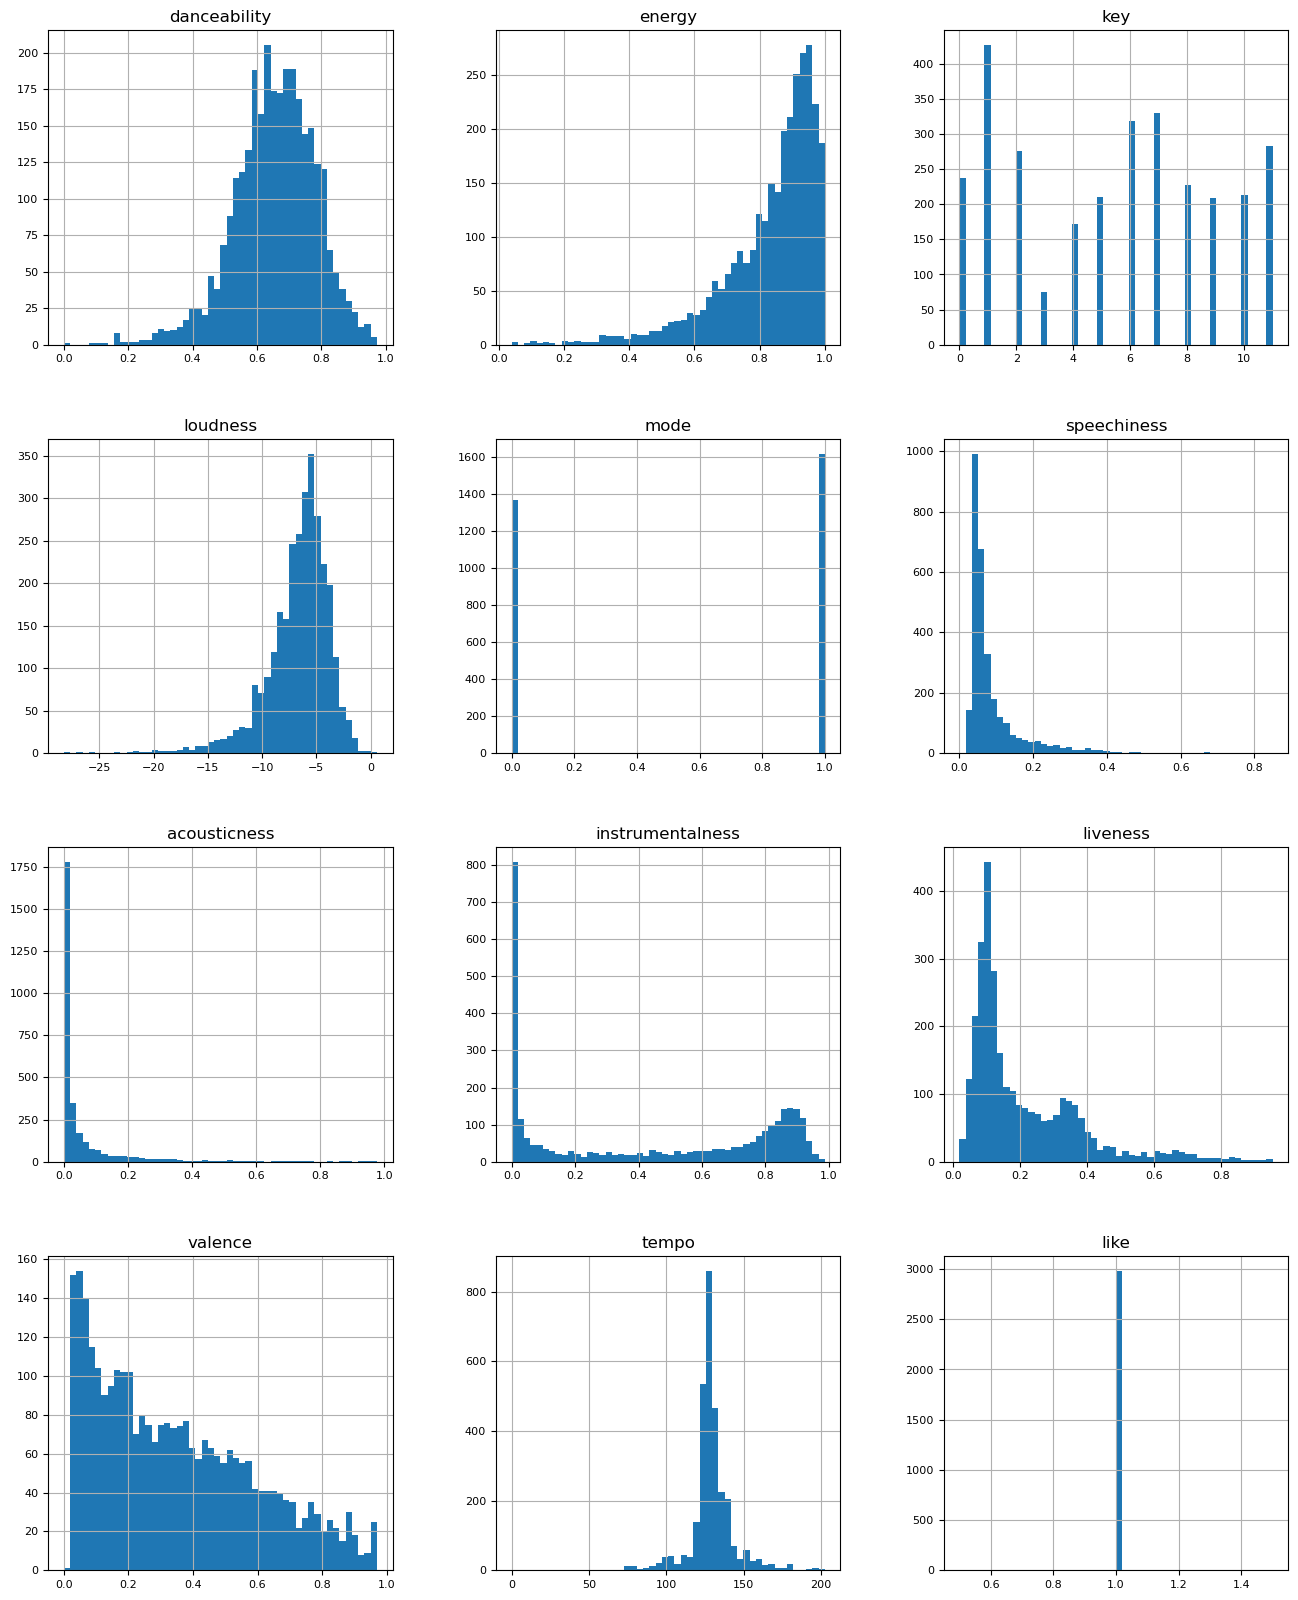

In [10]:
# display the dataframe in a histogram
techno_songs.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


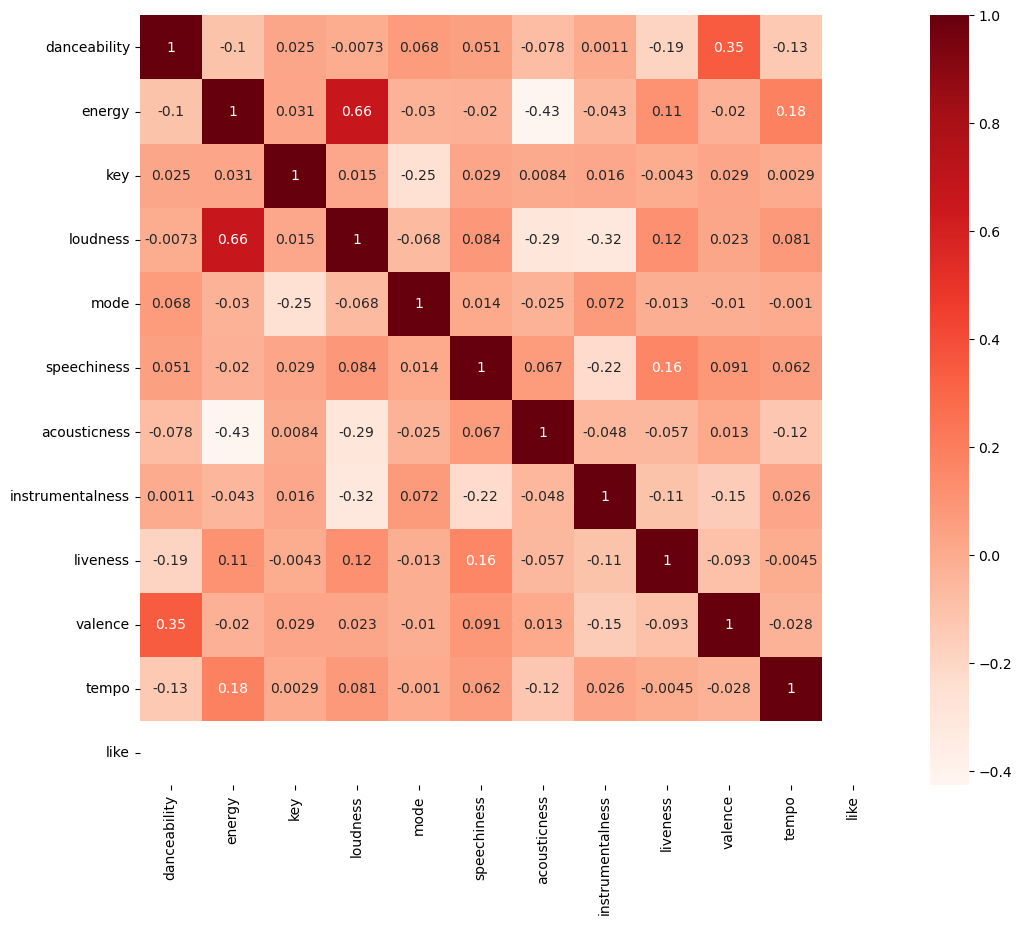

In [11]:
# find the correlation between the features
corr = techno_songs.corr()
corr

# display the correlation in a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()





In [12]:
# based on the techno_songs values, create a new dataframe that has normalized values
techno_songs_norm = techno_songs.copy()
techno_songs_norm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = techno_songs_norm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
techno_songs_norm.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.0
mean,0.673068,0.826219,0.491629,0.748173,0.541765,0.103579,0.063242,0.443116,0.206934,0.355488,0.636997,1.0
std,0.130843,0.153343,0.323802,0.100616,0.498336,0.094491,0.135476,0.378796,0.180648,0.252981,0.070965,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.597122,0.759575,0.181818,0.702223,0.000000,0.052179,0.001851,0.012361,0.082459,0.138144,0.616830,1.0
50%,0.679342,0.873022,0.545455,0.766791,1.000000,0.068551,0.010643,0.468085,0.129364,0.312371,0.631747,1.0
75%,0.763618,0.935470,0.727273,0.812491,1.000000,0.108481,0.052506,0.838906,0.304990,0.536082,0.656581,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


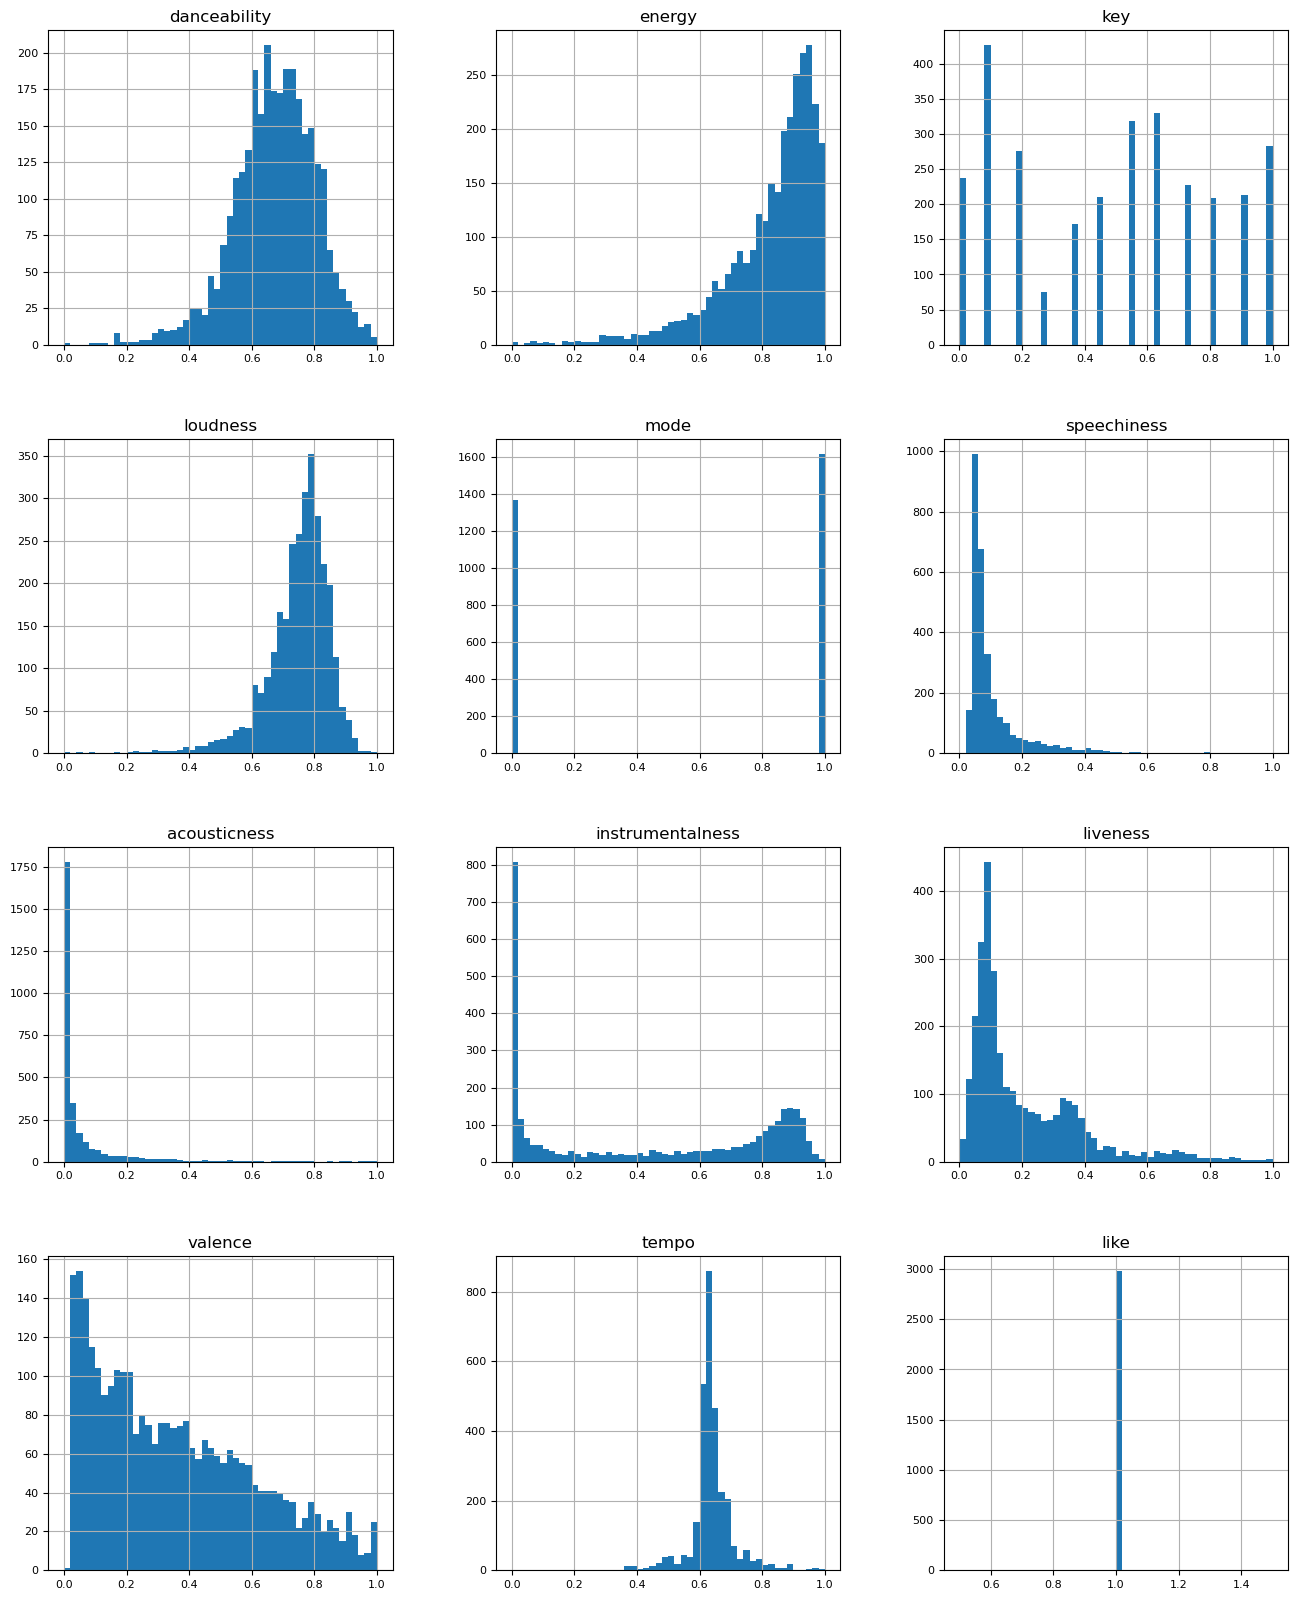

In [13]:
# display the normalized dataframe in a histogram
techno_songs_norm.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


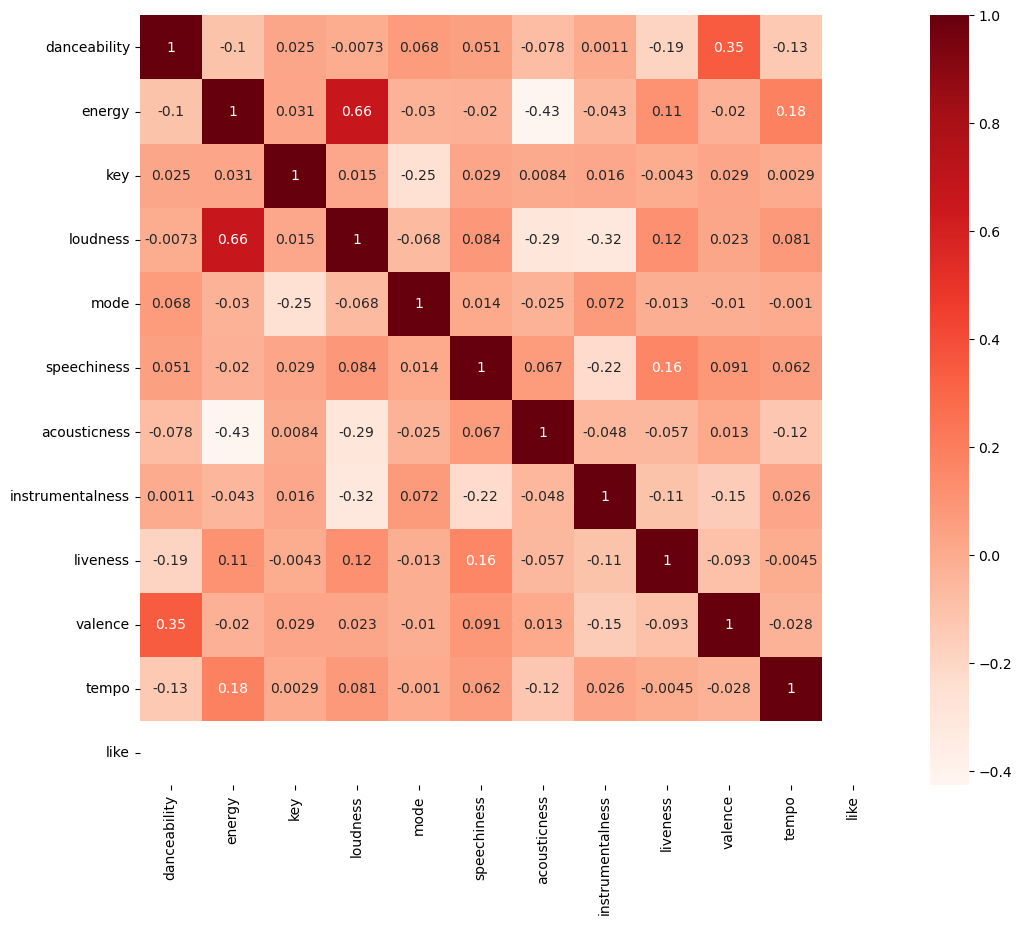

In [14]:
# find the correlation between the normalized features and display in a heatmap
corr_norm = techno_songs_norm.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_norm, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
# remove the upper triangle of the correlation matrix
upper_norm = corr_norm.where(np.triu(np.ones(corr_norm.shape), k=1).astype(np.bool))

# only find the top 4 feature pairs that have the highest correlation
strong_corr_norm = upper_norm.stack().sort_values(ascending=False).iloc[0:4]
strong_corr_norm

C:\Users\USER\AppData\Local\Temp\ipykernel_27320\824417113.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_norm = corr_norm.where(np.triu(np.ones(corr_norm.shape), k=1).astype(np.bool))


energy        loudness    0.659184
danceability  valence     0.347071
energy        tempo       0.183909
speechiness   liveness    0.161731
dtype: float64

In [16]:
# remove the upper triangle of the correlation matrix 
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


# only find the top 4 feature pairs that have the highest correlation
strong_corr = upper.stack().sort_values(ascending=False).iloc[0:4]
strong_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_27320\1889419626.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


energy        loudness    0.659184
danceability  valence     0.347071
energy        tempo       0.183909
speechiness   liveness    0.161731
dtype: float64

In [17]:
# list of genres to be used in the search query
genres = ["pop", "rock", "jazz", "hip-hop", "classical", "country", "techno", "blues", "metal", "reggae"]

# initialize empty dataframes for the final training and testing sets
train_songs = pd.DataFrame(columns=['song_name', 'artist_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'like'])
test_songs = pd.DataFrame(columns=['song_name', 'artist_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'like'])

request_counter = 0

# iterate over the genres
for genre in genres:
    # search for playlists of that genre
    playlists = sp.search(q=genre, type='playlist', limit=1)
    
    genre_songs = pd.DataFrame(columns=['song_name', 'artist_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'like'])
    
    for i, playlist in enumerate(playlists['playlists']['items']):
        print("%4d %s %s" % (i + 1, playlist['uri'], playlist['name']))
        results = sp.playlist(playlist['uri'])
        
        # limit the number of songs fetched from each playlist
        for j in range(min(50, len(results['tracks']['items']))):
            
            if request_counter % 100 == 0 and request_counter > 0:
                time.sleep(5)
            request_counter += 1
            
            # skip if track or track ID is None
            if results['tracks']['items'][j]['track'] is None or results['tracks']['items'][j]['track']['id'] is None:
                continue
            
            # get audio features for the song
            features = sp.audio_features(results['tracks']['items'][j]['track']['id'])
            
            # skip if features list is empty or contains None as its first element
            if not features or features[0] is None:
                continue
            
            # get song name and artist name
            song_name = results['tracks']['items'][j]['track']['name']
            artist_name = results['tracks']['items'][j]['track']['artists'][0]['name']
            
            # check if song already exists in the techno songs dataframe, if not, add it
            if not any((techno_songs['song_name'] == song_name) & (techno_songs['artist_name'] == artist_name)):
                # get audio features
                danceability = features[0]['danceability']
                energy = features[0]['energy']
                key = features[0][ 'key']
                loudness = features[0]['loudness']
                mode = features[0]['mode']
                speechiness = features[0]['speechiness']
                acousticness = features[0]['acousticness']
                instrumentalness = features[0]['instrumentalness']
                liveness = features[0]['liveness']
                valence = features[0]['valence']
                tempo = features[0]['tempo']
                
                # assign 'like' value based on genre
                # for simplicity, assign 1 if genre is techno, 0 otherwise
                like = 1 if genre == "techno" else 0
                
                # add the song and the features to the dataframe
                genre_songs.loc[len(genre_songs)] = [song_name, artist_name, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, like]
    
    # split the songs from this genre into training and testing sets
    genre_train_songs, genre_test_songs = train_test_split(genre_songs, test_size=0.2)
    
    # add the training and testing songs from this genre to the final training and testing sets
    train_songs = pd.concat([train_songs, genre_train_songs])
    test_songs = pd.concat([test_songs, genre_test_songs])


   1 spotify:playlist:37i9dQZF1EQncLwOalG3K7 Pop Mix
   1 spotify:playlist:37i9dQZF1EQpj7X7UK8OOF Rock Mix
   1 spotify:playlist:37i9dQZF1DWV7EzJMK2FUI Jazz in the Background
   1 spotify:playlist:37i9dQZF1EQnqst5TRi17F Hip Hop Mix
   1 spotify:playlist:37i9dQZF1DWWEJlAGA9gs0 Classical Essentials
   1 spotify:playlist:37i9dQZF1EQmPV0vrce2QZ Country Mix
   1 spotify:playlist:37i9dQZF1DX6J5NfMJS675 Techno Bunker
   1 spotify:playlist:37i9dQZF1EQpz3DZCEoX3g Blues Mix
   1 spotify:playlist:37i9dQZF1EQpgT26jgbgRI Metal Mix
   1 spotify:playlist:37i9dQZF1EQpjs4F0vUZ1x Reggae Mix


In [18]:
train_songs

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
26,Roar,Katy Perry,0.671,0.771,7,-4.821,0,0.0316,0.00492,0.000007,0.3540,0.436,90.003,0
41,Dark Horse,Katy Perry,0.647,0.585,6,-6.123,1,0.0512,0.00314,0.000000,0.1650,0.353,131.934,0
2,vampire,Olivia Rodrigo,0.511,0.532,5,-5.745,1,0.0560,0.16900,0.000000,0.3110,0.322,137.827,0
24,Don't Start Now,Dua Lipa,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,0
39,In My Blood,Shawn Mendes,0.622,0.712,5,-7.321,1,0.0660,0.05730,0.000000,0.1300,0.487,140.025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Ilegal,Cultura Profética,0.826,0.577,10,-4.707,0,0.0485,0.36600,0.000000,0.0923,0.772,116.916,0
45,Why Am I A Rastaman?,Culture,0.787,0.591,11,-4.075,1,0.0875,0.17300,0.000000,0.0236,0.707,81.025,0
11,Jerusalem,Alpha Blondy,0.717,0.446,8,-5.747,0,0.0666,0.42600,0.000055,0.1060,0.693,131.070,0
40,Rich Man Poor Man,The Gladiators,0.811,0.575,7,-8.348,1,0.1850,0.25200,0.000002,0.0865,0.804,139.899,0


In [19]:
test_songs

,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
43,Perfect Illusion,Lady Gaga,0.613,0.857,1,-5.492,0,0.0366,0.00120,0.000000,0.3580,0.664,124.987,0
34,"break up with your girlfriend, i'm bored",Ariana Grande,0.726,0.554,5,-5.290,0,0.0917,0.04210,0.000000,0.1060,0.335,169.999,0
38,Haberi Var Mı,Hande Yener,0.593,0.770,6,-7.146,0,0.0349,0.01140,0.000000,0.1910,0.944,128.031,0
29,Come & Get It,Selena Gomez,0.546,0.787,7,-4.100,0,0.0517,0.01010,0.000210,0.0809,0.573,79.979,0
10,Sorry,Justin Bieber,0.654,0.760,0,-3.669,0,0.0450,0.07970,0.000000,0.2990,0.410,99.945,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,Better Must Come,Delroy Wilson,0.715,0.578,9,-7.540,1,0.1020,0.00354,0.000096,0.3010,0.918,74.349,0
14,More Justice,Damian Marley,0.745,0.680,5,-4.734,0,0.2630,0.08350,0.000000,0.1810,0.887,77.712,0
37,Ritmo Que Pesa,Cultura Profética,0.772,0.672,11,-5.979,0,0.3660,0.19300,0.000000,0.6250,0.665,77.034,0
39,Gimme Likkle One Drop,Tarrus Riley,0.682,0.728,4,-3.328,1,0.1520,0.25600,0.000000,0.1180,0.783,86.996,0


In [48]:
# split the dataframe from techno_songs into 20% test set and 80% training set
techno_train_songs, techno_test_songs = train_test_split(techno_songs, test_size=0.2)
X_train = pd.concat([techno_train_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1), train_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1)])
y_train = pd.concat([techno_train_songs['like'], train_songs['like']])
X_test =  pd.concat([techno_test_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1), test_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1)])
y_test = pd.concat([techno_test_songs['like'], test_songs['like']])
y_train = y_train.astype(int)
y_test = y_test.astype(int)



dtype('int32')

Text(0.5, 0, 'Number of Neighbors')

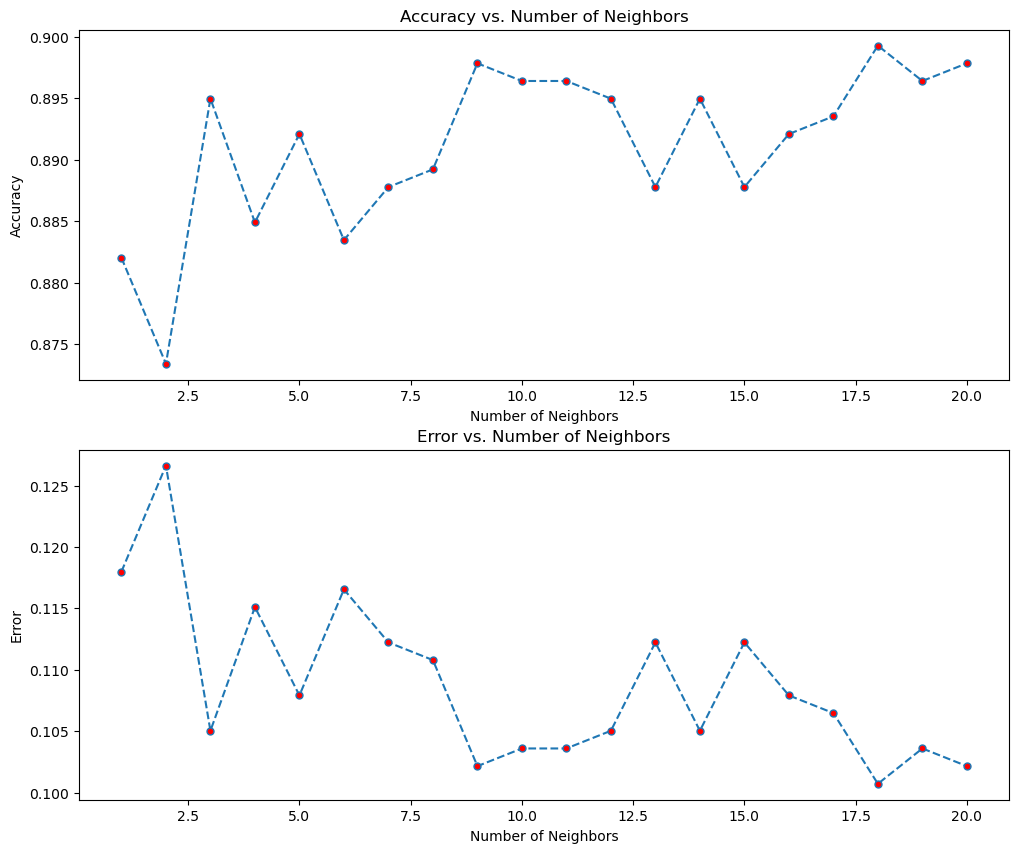

In [50]:
fig, axes = plt.subplots(6, 3, figsize=(12, 10))
neighbors = np.arange(1, 21, 1)
accuracy = list()
error = list()

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  accuracy.append(knn.score(X_test, y_test))
  error.append(np.mean(y_test != knn.predict(X_test)))

plt.subplot(2, 1, 1)
plt.plot(neighbors, accuracy, linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. Number of Neighbors')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')

plt.subplot(2, 1, 2)
plt.plot(neighbors, error, linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error vs. Number of Neighbors')
plt.ylabel('Error')
plt.xlabel('Number of Neighbors')

In [72]:
# retrieve songs from various genres


1    644
0     51
Name: like, dtype: int64

In [78]:

# Fetch a number of random songs from Spotify (this is a simplified example, actual implementation may differ)
results = sp.search(q='genre:"Electronic"', limit=20)

# Extract song IDs
song_ids = [track['id'] for track in results['tracks']['items']]

# Get audio features for these songs
audio_features = sp.audio_features(song_ids)

# Create a DataFrame from the audio features
songs_df = pd.DataFrame(audio_features)

# Drop unnecessary columns from the DataFrame
songs_df = songs_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'mode', 'key','duration_ms','time_signature'], axis=1)

# Use the KNN model to predict whether you'll like the songs
predictions = knn.predict(songs_df)

# Create a DataFrame of the songs and predictions
songs_and_predictions = pd.DataFrame({
    'prediction': predictions,
    'song_id': song_ids,
    # find the song name in results using the song ID
    'song_name': [next(item for item in results['tracks']['items'] if item['id'] == song_id)['name'] for song_id in song_ids],
})

# Print the DataFrame
print(songs_and_predictions)

    prediction                 song_id  \
0            1  0ITaSRuI0L1RNL7ZNYTTi7   
1            1  0lYBSQXN6rCTvUZvg9S0lU   
2            1  0g5EKLgdKvNlln7TNqBByK   
3            0  2oDqmfa2g8W893LlwJG1qu   
4            1  57kR5SniQIbsbVoIjjOUDa   
5            0  4LIM4qmpHABufePRrLWbiM   
6            1  2qLSXZuIHMsKydCEFDchc3   
7            0  4w8niZpiMy6qz1mntFA5uM   
8            1  3OaunNUlXXs5e2PXtNAzzG   
9            1  67awxiNHNyjMXhVgsHuIrs   
10           1  4OWa2dOlmtvMDhFrFL0QA1   
11           1  5ugzDiilhy6ILKmKfhEzd7   
12           1  6osaMSJh9NguagEDQcZaKx   
13           0  4pTkDIlpFNoeWbahu8pVXW   
14           1  4YIoQqE50AdyG4BQafCi3u   
15           1  5soMJpcVhSrGrB4prvPL6P   
16           1  6IPNp9PfaEqrzotY47TIWy   
17           1  3r44Otr6SVUja3SYsCuhVY   
18           1  4p16E9c9Ig6xFMGS3Y82mT   
19           1  67Hna13dNDkZvBpTXRIaOJ   

                                            song_name  
0                         U Are My High (with Future)  
1    